# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


In [0]:
# adapted from lecture notes, using morlet wavelet

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    y=0.
    if(0<t and t<15):
        y=sin(t*t)
    else:
        y=0
    return y

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau] +=1.0/sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr*dtstep)
wavelet()

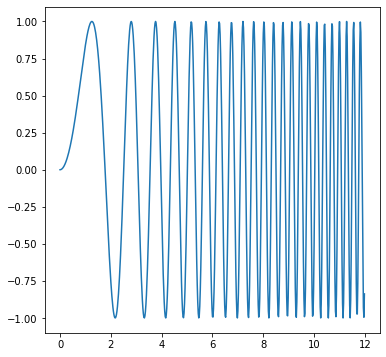

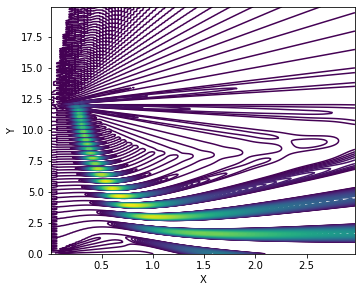

In [56]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure(figsize=(6,6))                                    # Create figure
# ax = Axes3D(fig) 
p.plot(tar,yarr)

fig = p.figure(figsize=(12,10))  
# ax = fig.add_subplot(2,2,1,projection='3d')
# X, Y = p.meshgrid(sar, tauar) 
# ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
# ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
# ax.set_xlabel('s')
# ax.set_ylabel('tau')
# ax.set_zlabel('Y')

ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

This is pretty simular to the one online, the difference of course being the function of $sin(t^2)$ vs whatever a black hole gives as a function.


The image I used as an example: https://www.google.com/search?q=first+gravitational+wave&rlz=1C1CHZL_enUS704US704&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi13rnd94vpAhUMGTQIHVmoAUwQ_AUoAnoECB0QBA&biw=2133&bih=1076#imgrc=UFPWJ1GIQMGWPM